---

# 4 Getting started with neural networks:

# Classification and regression

In [34]:
import os
import numpy as np

import keras
import tensorflow as tf

import matplotlib.pyplot as plt

plt.rcParams['lines.markersize'] = 2  # nice scatter point size
from IPython.display import YouTubeVideo
from IPython.display import clear_output

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # mute some annoying warnings

#### Binary classification: data → scalar (probability of *one* class)

*\"Here is a photo, is it a cat or not?" (Negative/Positive, detecting if something is there, etc.)*

#### Multiclass classification: data → vector (distribution over *many classes*)

*\"Here is a photo, multiple choice for you: is it a cat, a dog, an airplane, a flower, ... ?*

## * Regression: data → scalar (a continuous value describing the data)

*\"Here is a data about a house, what is its price)?* <small>☠️☠️☠️ *Logistic regression* (*classification problem*) ≠ *regression*!!</small>

<!-- ![Classification vs regression](images/ml/Classification-vs-Regression.png) -->
<img src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/ml/Classification-vs-Regression.png?raw=true">

<small>[Sami Belkacem, "Machine learning approaches to rank news feed updates on social media", ResearchGate](https://www.researchgate.net/figure/Classification-vs-Regression_fig2_350993856)</small>

---

# 4.3 Predicting house prices: A regression example

### 4.3.1 The California housing price dataset

The IMDB and Reuters (and MNIST) problems are examples of **classification**.

Decide a particular **class** from a finite number of possibilities.

They are **discrete** problems.

**Regression** problems, on the other hand, are **continuous**.

E.g. Predicting tomorrow's temperature, the time to run a marathon or...

1990s house prices in California.

Prices are continuous!

The [California Housing dataset](https://keras.io/api/datasets/california_housing/) ([source](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (down?), also on [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices), [scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)).

The aim is the prediction of the median house price on the basis of knowledge of income levels, rooms per dwelling, etc. (eight features in total).

There are two versions in Keras: `small` only 600 data samples, split into 480 training and 120 test; and `large` containing 20,640.

It is a good example of a **small** dataset.

Furthermore, each feature has a **different scale**.

Some features are values in $[0, 1]$, some in $[1, 12]$, some in $[0, 100]$.

### Code: loading our dataset

In [56]:
(train_data, y_train), (test_data, test_targets) = keras.datasets.california_housing.load_data(version="small")
print(train_data.shape, test_data.shape)

(480, 8) (120, 8)


### Examining our dataset

The first sample.

In [36]:
print(train_data[0])

[-1.2224e+02  3.7730e+01  2.1000e+01  7.0310e+03  1.2490e+03  2.9300e+03
  1.2350e+03  4.5213e+00]


The targets of the first ten samples in thousands of dollars.

In [37]:
y_train[:10] # prices between $60,000 and $500,000 (ಥ﹏ಥ)

array([228400., 132900.,  60000.,  95200., 107000., 122500., 132000.,
       290100., 257800., 390100.], dtype=float32)

The 8 input features are the following:

- `Longitude`: block group longitude
- `Latitude`: block group latitude
- `HouseAge`: median house age in block group
- `Population`: block group population 
- `MedInc`: median income in block group
- `AveRooms`: average number of rooms per household
- `AveBedrms`: average number of bedrooms per household
- `AveOccup`: average number of household members

In [38]:
column_names = [
    'Longitude', 'Latitude',  'HouseAge', 'MedInc',
    'Population', 'AveRooms', 'AveOccup', 'AveBedrms',
]

for name in column_names:
    print(f"{name:>12}", end="")
print()
print("-" * 96)
for row in range(20):
    for col in range(8):
        x = train_data[row, col]
        print(f"{x:12.4f}", end="")
    print()

   Longitude    Latitude    HouseAge      MedInc  Population    AveRooms    AveOccup   AveBedrms
------------------------------------------------------------------------------------------------
   -122.2400     37.7300     21.0000   7031.0000   1249.0000   2930.0000   1235.0000      4.5213
   -122.2800     37.8500     48.0000   2063.0000    484.0000   1054.0000    466.0000      2.2625
   -122.2900     37.8200      2.0000    158.0000     43.0000     94.0000     57.0000      2.5625
   -122.2900     37.8100     46.0000    935.0000    297.0000    582.0000    277.0000      0.7286
   -122.1800     37.7600     37.0000   1575.0000    358.0000    933.0000    320.0000      2.2917
   -122.2300     37.7900     48.0000   1696.0000    396.0000   1481.0000    343.0000      2.0375
   -122.2800     37.8400     52.0000    729.0000    160.0000    395.0000    155.0000      1.6875
   -122.2800     37.8900     52.0000   2315.0000    408.0000    835.0000    369.0000      4.5893
   -122.2500     37.8100     2

#### Standardisation / Normalisation

These ranges present difficulties.

Neural networks have difficulty adapting to heterogeneous data.

The data will have to be **standardised** / **normalised**.

Note: Chollet uses normalisation as an umbrella term, [as it often happens](https://en.wikipedia.org/wiki/Normalization_(statistics)).

---

## 4.3.1 Preparing the data

### Standardisation

- subtract the **mean** (= **average**);
- divide by the **standard deviation**.

What does this do?

It makes any distribution **centred** at zero, with a **standard deviation** of one.

The math...

$$
\bbox[5px,border:2px solid red]
{
{\frac {X-\mu }{\sigma }}
}
$$

$X$: our data  
$\mu$: the mean
$\sigma$: the standard deviation

### Normalisation

- subtract the **min value**;
- divide by the **range (max value - min value)**.

What does this do?

It squishes any distribution to a range of *\[0, 1\]*.

(We are not using this now.)

The math...

$$
\bbox[5px,border:2px solid red]
{
X'={\frac {X-X_{\min }}{X_{\max}-X_{\min }}}}
$$

$X$: our data   
$X_{\min }$: the min value in our data  
$X_{\max}$: the max value in our data  

### Compute stats on Train, apply those to Test

Test data is normalised using the mean and standard deviation of the *training* set.

In general, we want the **train** and **test** (and any further data) sets to come for the **same distribution**.

But we also want to keep our **test** aside, not get any influence from it.

Treat it as if was really data our net would encounter *in the wild*.

### Code: Normalization

In [64]:
# axis 0: along each feature axis!
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# shift & scale using the train statistics
x_train = (train_data - mean) / std
x_test = (test_data - mean) / std

In [65]:
y_train = train_targets / 100000
y_test = test_targets / 100000

### Notes

Beware the small API differences in TF: 
```python
mean = tf.reduce_mean(x)
std = tf.math.reduce_std(x)
```

#### Manual example

In [41]:
def stats(x):
    mean = sum(x) / len(x)                          # compute the mean
    deviations = x - mean                           # deviations can be positive or negative
    avg_sq_deviations = sum(deviations**2) / len(x) # we square them and take the mean
    std = np.sqrt(avg_sq_deviations)                # then we take the square root
    return mean, std

In [42]:
def normalise(x):
    mean, std = stats(x)
    return (x - mean) / std, mean, std # subtract the mean, divide by the standard deviation

#### Plotting normalized data

In [43]:
def plot_mean_std(nums):
    nums_norm, mean, std = normalise(nums)

    fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))

    ax1.bar([str(x) for x in range(nums.shape[0])], nums)                              # our numbers
    ax1.set_title(f"Original numbers | mean: {mean:.2f}, std: {std:.2f}")
    ax1.plot([mean] * nums.shape[0], linestyle='solid', color="r", label="mean")       # the mean
    ax1.plot([mean + std] * nums.shape[0], linestyle='dotted', color="r", label="std") # mean + std
    ax1.plot([mean - std] * nums.shape[0], linestyle='dotted', color="r")              # mean - std
    ax1.legend()

    ax2.bar([str(x) for x in range(nums_norm.shape[0])], nums_norm)                    # our numbers normalised
    ax2.set_title(f"Normalized | mean: {nums_norm.mean():.2f}, std: {nums_norm.std():.2f}")
    plt.show()

First example, 5 numbers. **Mean**: 30. **Standard deviation** : ~14.

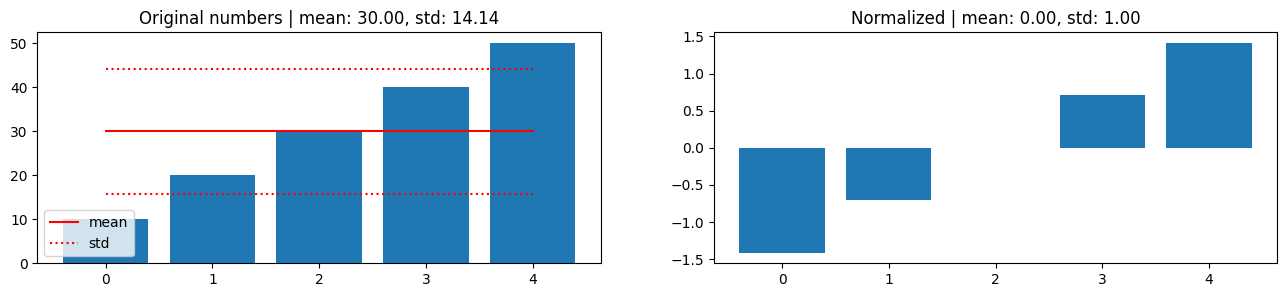

In [44]:
plot_mean_std(np.array([10.0, 20.0, 30.0, 40.0, 50.0]))

Second example, 5 numbers. **Mean**: 30. **Standard deviation** : ~20.

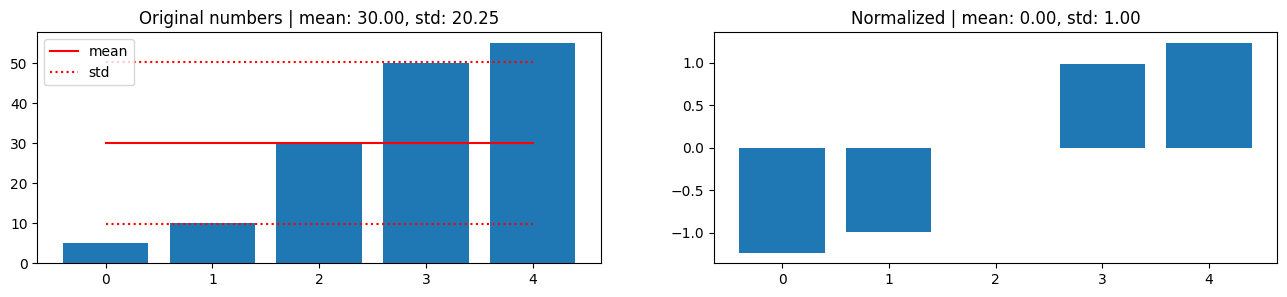

In [45]:
plot_mean_std(np.array([5.0, 10.0, 30.0, 50.0, 55.0]))

---

## 4.3.3 Building your model

We predict the value directly, therefore _no activation_ on the last layer.

### Loss: Mean squared error  (MSE)

A common regression **loss**:

$$
\bbox[5px,border:2px solid red]
{
\text{MSE} = \frac{1}{N} \sum (y_{pred} - y)^2
}
$$

$y$: target  
$y_{pred}$: network output  
$N$: mini-batch size

- continuous and differentiable;
- cost grows exponentially: outliers are penalised.

### Metric: Mean absolute error (MAE)

Our **metric** will be:

$$
\bbox[5px,border:2px solid red]
{
\text{MAE} = \frac{1}{N}\sum |y_{pred} - y |
}
$$

- nondifferentiable ([Keras will still allow you to use it as a loss...](https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative));
- grows linearly: outliers are not more penalised.

### Plot MSE vs MAE

In [46]:
def plot_mse_mae():
    nums = np.linspace(-1.5,1.5, 100) # one hundred numbers from -10 to 10

    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(16,3))

    ax1.plot(nums, nums ** 2)                     # mean squared error (from zero)
    ax1.set_title("Mean squared error (MSE)")
    ax1.set_xlabel("distance from the mean")
    ax1.set_ylabel("loss")
    ax2.plot(nums, np.abs(nums))                  # mean absolute error (from zero)
    ax2.set_title(f"Mean absolute error (MAE)")
    ax2.set_xlabel("distance from the mean")
    ax2.set_ylabel("loss")
    plt.show()

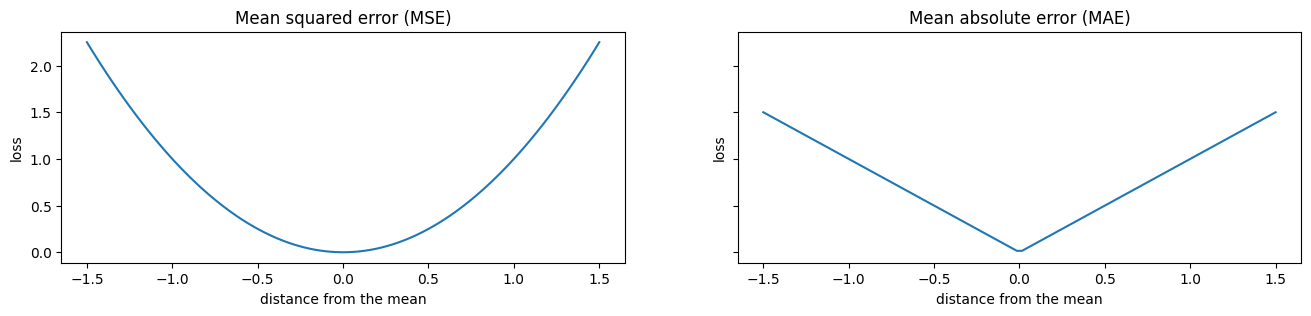

In [47]:
plot_mse_mae()

### Code: build the model

In [48]:
def build_model(clear=True): # modular programming!
    if clear:
        tf.keras.backend.clear_session()
    model=tf.keras.models.Sequential()
    model.add(tf.keras.Input((x_train.shape[1],))),
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
            # ↓ NO ACTIVATION! We just predict (any) number
    model.add(tf.keras.layers.Dense(1))
            # ↑ -------------------------------------------
    model.compile(
        optimizer='rmsprop',
        loss='mse',            # ← MSE: mean squared error
        metrics=['mae']        # ← MAE: mean absolute error
    )
    return model

---

## 4.3.4 Validating your approach using K-fold validation

### Techniques for very small datasets

The training set is **small** and if we split it to have a a validation set it will be even smaller.

(The validation set would be tiny.)

The validation scores – on a tiny validation set – would be very sensitive to the constitution of that set.

### $K$-fold cross-validation

A common solution for small datasets.

The data is spilt into $K$ partitions (usually 4 or 5).

$K$ identical models are instantiated.

One of the $K$s is validation, the rest is train.

We then rotate which partition is the validation.

A new network is trained and validated on each of these *fold*.

The validation score is the **average** of the $K$ validation scores.

This technique mitigates **validation variance**.

<!-- ![Chollet K-fold](images/chollet/figure4.9.png) -->

<img style="" src="https://raw.githubusercontent.com/jchwenger/AI/main/3-getting-started/images/chollet/figure4.9.png">

<small>[DLWP](https://deeplearningwithpython.io/chapters/chapter04_classification-and-regression/#validating-your-approach-using-k-fold-validation), Chapter 4, Figure 4.9</small>

### Before training: commonsense baseline / evaluate untrained model

#### Compute dataset statistics

What are the max, min, mean and variance of our test targets?

In [60]:
y_test_min, y_test_max = y_test.min(), y_test.max()
y_test_mean, y_test_std = y_test.mean(), y_test.std()
print(f"Test prices, min: {y_test_min:.4f} (~{y_test_min*100_000:,.0f}$) | max:  {y_test_max:.4f} (~{y_test_max*100_000:,.0f}$)")
print(f"Mean of our test prices: {y_test_mean:.4f} (~{int(y_test_mean)*100_000:,}$)")
print(f"STD of our test prices:  {y_test_std:.4f} (~{int(y_test_std)*100_000:,}$)")

Test prices, min: 0.7410 (~74,100$) | max:  5.0000 (~500,001$)
Mean of our test prices: 1.9616 (~100,000$)
STD of our test prices:  1.0152 (~100,000$)


#### Regression baseline: predicting the mean

What score do we get if we just predict the mean?

In [61]:
mean_prediction = []
y_test_mean = y_test.mean()
for test in y_test:                                     # a very plain loop!
    mean_prediction.append(np.abs(test - y_test_mean))  # MAE using the mean of our test dataset
mean_prediction_mae = np.array(mean_prediction).mean()
print(f"Predicting the mean of our test_set: {y_test_mean:.5f} (~{int(y_test_mean)*100_000:,.0f}$)")
print(f"MAE: {mean_prediction_mae:.4f} (~{mean_prediction_mae*100_000:,.0f}$)")

Predicting the mean of our test_set: 1.96155 (~100,000$)
MAE: 0.8280 (~82,797$)


#### 'Neural' baseline: our untrained model

In [66]:
test_mse_score, test_mae_score = build_model().evaluate(x_test, y_test, verbose=0)
test_mse_score_sqrt = np.sqrt(test_mse_score)
msg =  f"MSE: {test_mse_score:.4f}, sqrt: {test_mse_score_sqrt:.4f} "
msg += f"(~{round(test_mse_score_sqrt*1000):,}$) | "
msg += f"MAE: {test_mae_score:.4f} (~{test_mae_score*100_000:,.0f}$)"
print(msg)

MSE: 6.2545, sqrt: 2.5009 (~2,501$) | MAE: 2.2287 (~222,866$)


I0000 00:00:1764683253.328818 6090084 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


### Code: Training with K-Fold validation

In [72]:
K = 4
num_val_samples = len(x_train) // K
num_epochs = 100
all_scores = []

for i in range(K):
    print(f"Processing fold {i+1}")
    
    # 1. Validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data, val_targets = x_train[a : b], y_train[a : b]

    # 2. Training data: data from all other partitions
    partial_x_train = np.concatenate([x_train[:a], x_train[b:]], axis=0)
    partial_y_train = np.concatenate([y_train[:a], y_train[b:]], axis=0)

    # 3. Build the Keras model (already compiled)
    model = build_model()

    # 4. Train the model (in silent mode, verbose=0)
    model.fit(partial_x_train, partial_y_train,
              epochs=num_epochs, batch_size=16, verbose=0)

    # 5. Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


Processing fold 1
Processing fold 2
Processing fold 3
Processing fold 4


### Code: Validation results

The fold MAE scores, and their range.

In [73]:
print(f"Validation MAE scores for each fold:")
for score in all_scores:
      print(f"{score:.4f} (~{score * 100_000:,.0f}$)")

Validation MAE scores for each fold:
0.3515 (~35,151$)
0.3572 (~35,716$)
0.2674 (~26,738$)
0.3004 (~30,041$)


In [74]:
min_score, max_score = min(all_scores), max(all_scores)
print(f"Validation MAE scores range from:")
print(f"{min_score:.4f} (~{min_score * 100_000:,.0f}$) to")
print(f"{max_score:.4f} (~{max_score * 100_000:,.0f}$)")

Validation MAE scores range from:
0.2674 (~26,738$) to
0.3572 (~35,716$)


The fold MAE scores mean.

In [75]:
val_mae_mean = np.mean(all_scores)
print(f"Validation MAE mean:")
print(f"{val_mae_mean:.4f} (~{val_mae_mean * 100_000:,.0f}$)")

Validation MAE mean:
0.3191 (~31,912$)


The average MAE is significant considering that the prices range from \\$60,000 to \\$500,000.

---

## More epochs & smoothing

We will now extend the run to 200 epochs and use a `history` object to record validation MAE at each epoch.

#### Callbacks

The `Model.fit()` has a parameter, `callbacks`, allowing us to add functionalities to be run at various points in our training. This is highly customizable.

See this [tutorial](https://www.tensorflow.org/guide/keras/custom_callback).

#### Code: custom callback

In [77]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):                                            # by passing epochs at initialization
        super(tf.keras.callbacks.Callback, self).__init__()                # I can use this as our total in on_epoch_begin
        self.epochs = epochs
    def on_epoch_begin(self, epoch, logs=None):                            # run at the start of each epoch
        c = ['|', '/', '-', '\\']
        clear_output(wait=True)
        print(f"{c[epoch % 4]} epoch: {epoch+1}/{self.epochs}")  # run at the very end of training
    def on_train_end(self, logs=None):
        print()

### Code: longer K-fold training

In [78]:
K = 4
num_val_samples = len(x_train) // K
num_epochs = 200
all_mae_histories = []

for i in range(K):
    print(f"Processing fold {i+1}")

    a, b = i * num_val_samples, (i + 1) * num_val_samples          # 1. Validation data: data from partition i
    val_data, val_targets = x_train[a : b], y_train[a : b]

                                                                   # 2. Training data: data from all other partitions
    partial_x_train = np.concatenate([x_train[:a], x_train[b:]], axis=0)
    partial_y_train = np.concatenate([y_train[:a], y_train[b:]], axis=0)

    model = build_model()                                          # 3. Build the Keras model (already compiled)

    history = model.fit(
        partial_x_train, partial_y_train,                 # 4. Train the model (in silent mode, verbose=0)
        epochs=num_epochs, batch_size=16, verbose=0,
        validation_data=(val_data, val_targets),
        callbacks=[CustomCallback(num_epochs)]                     # (← Callback object is passed to `Model.fit()`)
    )
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

\ epoch: 200/200



### Code: plotting results

In [79]:
# take the mean of all four folds for each epoch
average_mae_history = np.array(all_mae_histories).mean(axis=0)

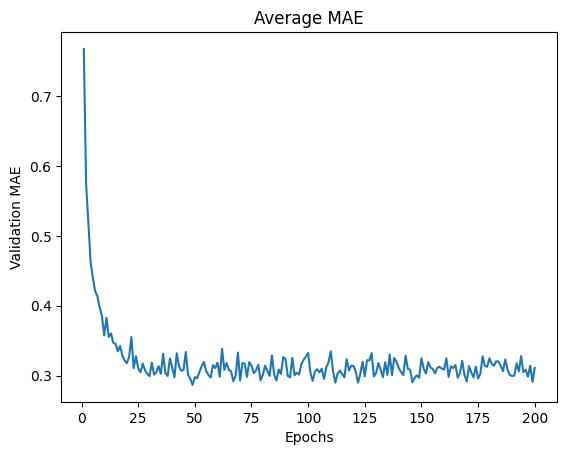

In [80]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Average MAE")
plt.show()

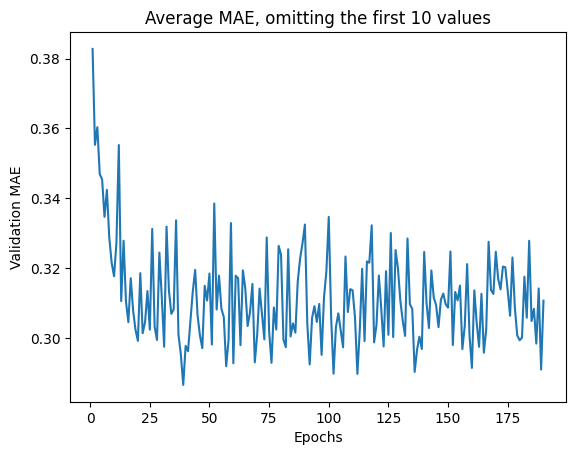

In [81]:
plt.plot(range(1, len(average_mae_history[10:]) + 1), average_mae_history[10:])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Average MAE, omitting the first 10 values")

plt.show()

### Code: smoothing results (EMA)

The code to smooth data by replacing each data point with a weighted sum of itself and the previous smoothed point.

In [83]:
def smooth_curve(points, beta = 0.9):       # beta must be between 0 and 1!
    smoothed_points = []
    for current in points:
        if smoothed_points:                 # (an nonempty list is 'True')
            previous = smoothed_points[-1]  # the last appended point
                                            # ↓ a weighted sum of previous & point, controlled by beta
            smoothed_points.append(beta * previous + (1 - beta) * current)
        else:
            smoothed_points.append(current) # at the start, the list is empty, we just add the first point
    return smoothed_points

#### Exponential Moving Averages

This is the same technique we briefly saw when we talked about *momentum*.

<!-- <img style="height:550px;float:right" src="images/andrew-ng-exponentially-weighted-averages.png"> -->
<img style="height:550px;float:right" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/andrew-ng-exponentially-weighted-averages.png?raw=true">


<small style="position:absolute;bottom:0;right:0">[Andrew Ng, Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization (Course 2 of the Deep Learning Specialization)](https://www.youtube.com/watch?v=k8fTYJPd3_I&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=20).</small>

#### Code: smoothed plot

The smoothed outcome, omitting the first 30 points

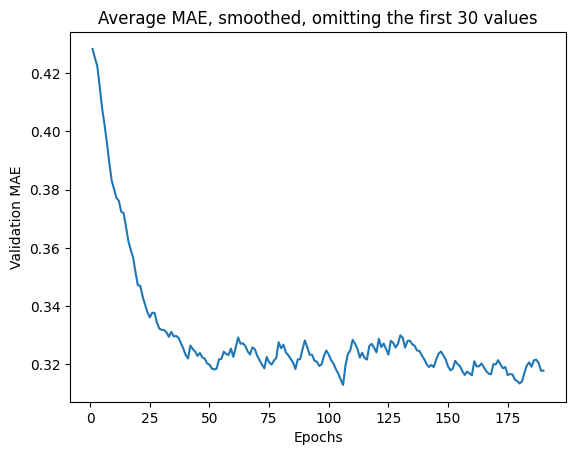

In [84]:
smooth_mae_history = smooth_curve(mae_history[10:]) # from 10 onward

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title("Average MAE, smoothed, omitting the first 30 values")
plt.show()

### Code: automatic best epoch extraction 

Lowest MAE occurs at epoch...

In [85]:
# compare with smooth_mae_history
print(np.argmin(average_mae_history))

48


---

## Final model

We train a new model:
- on the whole training data
- until the epoch with lowest MAE

### Code: build and train with early stopping

In [86]:
model = build_model()
model.fit(
    x_train, # ← WHOLE TRAINING DATA
    y_train,
           # ↓ EPOCH WITH LOWEST MAE ----------
    epochs = np.argmin(average_mae_history) + 1, # could do another run with smooth_mae_history as well
           # ↑ --------------------------------
    batch_size = 16
)

Epoch 1/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 2.4127 - mae: 1.1992
Epoch 2/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.8972 - mae: 0.6857
Epoch 3/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.4895 - mae: 0.5196
Epoch 4/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.3953 - mae: 0.4572
Epoch 5/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.3390 - mae: 0.4138
Epoch 6/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.3093 - mae: 0.4000
Epoch 7/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.2841 - mae: 0.3779
Epoch 8/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.2553 - mae: 0.3565
Epoch 9/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.2445 - mae: 0.3409
Epoch 10/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.2414 - mae: 0.3368
Epoch 11/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.2165 - mae: 0.3168
Epoch 12/49
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.2061 - mae: 0.3101
Epoch 13/49
30/30 ━━━━━━━

### Code: evaluate on the test set

In [90]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test, verbose=0)
test_mse_score_sqrt = np.sqrt(test_mse_score)
msg =  f"MSE: {test_mse_score:.4f}, sqrt: {test_mse_score_sqrt:.4f} "
msg += f"(~{round(test_mse_score_sqrt*100_000):,.0f}$) | "
msg += f"MAE: {test_mae_score:.4f} (~{test_mae_score*100_000:,.0f}$)"
print(msg)

MSE: 0.3297, sqrt: 0.5742 (~57,423$) | MAE: 0.3186 (~31,863$)


---

## 4.3.6 Wrapping up

### Workflow

1. Prepare the data & split into Train/Validation/Test
2. Define your model
3. Evaluate your untrained model / a **commonsense baseline**
4. Train using **Train/Validation**
5. Tweak **hyperparameters** → pick best validation results
5. Evaluate on **Test**

### Summary

#### Inputs

- **Standardise/normalise** if the features are in different ranges;

##### Labels

- Just a number, meaning **no activation** in the last layer;

#### Key ideas

- **Do you know your data??**
- Overfitting;
- Commonsense baselines;
- K-fold validation (for small datasets);

### Regression

- We predict a **continuous value** (the price of a house);
- The final layer has **no activation**;
- The loss function is the **mean squared error**: `mse`;
- Instead of accuracy, use the **mean average error** `mae`;
- The model outputs the **desired output** (scaled).

### Experiments

- More or fewer hidden layers – 32 units, 64 units etc.;
- Try different learning rates;
- Replace `relu` with an early neural network favourite, `tanh`;
- Try the [`Adam` optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#classes_2): `optimizers.Adam(learning_rate=0.001)`